<img src="https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/logo/SAVEMONEY_logo_with_letter.png"  height="autox" width="600p">

*Simple Algorithm for Very Efficient Multiplexing of Oxford Nanopore Experiments for You!*

# Overview <font size="4">(<a href="#ReleaseNotes">what's new in ver_0.3.7</a>: <font size="3" color="#ff0000">*now supports amplicon sequencing*</font>)</font>

SAVEMONEY guides researchers to mix multiple plasmids for submission as a single sample to a commercial long-read sequencing service (e.g., Oxford Nanopore Technology), reducing overall sequencing costs while maintaining fidelity of sequencing results. Following is the outline of the procedure:

- <a href="#Step1">**Step 1. Pre-survey**</a> takes plasmid maps as inputs and provides users with optimal groupings of plasmids.
- <a href="#Step2">**Step 2. Submit samples**</a> according to the output of the pre-survey.
- <a href="#Step3">**Step 3. Post-analysis**</a> executes a computational deconvolution of the obtained results, and generates a consensus sequence for each plasmid.
- An optional step, <a href="#Step4">**Step 4. Visualization of results (optional)**</a> provides a platform for the detailed examination of the alignments and consensus generated in the post-analysis.

Detailed instructions are provided inside cells at each step. For more information, please see:

- <a href="#QuickGuide">**Quick guide**</a>, <a href="#InterpretationOfResults">**Interpretation of results**</a>, <a href="#FAQ">**Troubleshooting**</a>, <a href="#ReleaseNotes">**Release notes**</a>
- <details><summary>Graphical abstract</summary>
<div><center>
<img src="https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/figures/Fig1_20230313_margin.png" width="500" style="display:inline-block; margin:auto">
</center></div>
</details>
- [SAVEMONEY BATCH](https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanoporeBatch.ipynb) <font color='#ff0000'>*New!!*</font>
- [SAVEMONEY GitHub](https://github.com/MasaakiU/MultiplexNanopore)
- [Slide from Weill Institute Science Workshop, May 22, 2023](https://github.com/MasaakiU/MultiplexNanopore/blob/master/resources/slides/20230522_Weill-Institute-Science-Workshop.pdf)


We would appreciate it if you could cite our manuscript if you use it toward any publications.<br>
[Uematsu, M. and Baskin, J.M. Barcode-free multiplex plasmid sequencing using Bayesian analysis and nanopore sequencing. *eLife*. **2023**; 12: RP88794](https://doi.org/10.7554/eLife.88794.1)

<a name="Step1"></a>
# Step 1. Pre-survey
Before you submit your samples, plasmid maps can be analyzed by the pre-survey step to provide a recommendation for what combination of plasmids is safe to mix. If your plasmids are very different, i.e., completely different vector/backbone or insert, then you can skip this step and assume those plasmids are safe to mix together. Follow the steps below to execute pre-survey.

installing dependencies...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.6/250.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.5 MB/s eta 0:00:00
  Created wheel for savemoney: filename=savemoney-0.3.7-cp311-cp311-linux_x86_64.whl size=1208708 sha256=ce53c43e81a3643f8c45ffca0e076072d131532af2b3d23f9fc52b2ab73cfb31
  Stored in directory: /root/.cache/pip/wheels/34/f5/2a/b610426839009b606119ea783966f5b555107a60341de7c2e1
Successfully built savemoney
--2025-05-09 21:26:41--  https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/font/Arial.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.13

100%|███████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.71it/s]


calculation: DONE

determining number of groups...
determination: DONE

============================================== NOTICE ==============================================
provided `distance_threshold`	8
provided `number_of_groups`	1
adopted `distance_threshold`	294
adopted `number_of_groups`	2
`end_row_to_iter_plus`	1
Provided `number_of_groups` 1 is to small to meet the `distance_threshold` 8. The `number_of_groups`
2 will be used instead. To achieve number of groups 1, lower the `distance_threshold`. Apart from
that, higher `distance_threshold` 294 was used and the provided value 8 was ignored. This is because
the use of higer `distance_threshold` returns safer pre-survey results, and `distance_threshold` was
able to be increased without changing the new `number_of_groups` 2.

executing plasmid assignment...


100%|██████████████████████| 9/9 [00:00<00:00, 94.86it/s, examining edge (np.int64(1), np.int64(2))]



assignment: DONE

exporting results...
export: DONE

=== Group 1 ===
P2	igap-ch1-ch3.fasta
P4	ides-hinge-ch3-guess-at-map.fasta
P3	h-ides-mid-way-selpls00372-psbnl0x40-pctcon2-ets-flag-ides_new-6his-ers-pgal1_10-aga2-ha-ch2-ch3-myc-ers.fasta

=== Group 2 ===
P5	igap-hinge-ch3.fasta
P1	0x40-yess.fasta




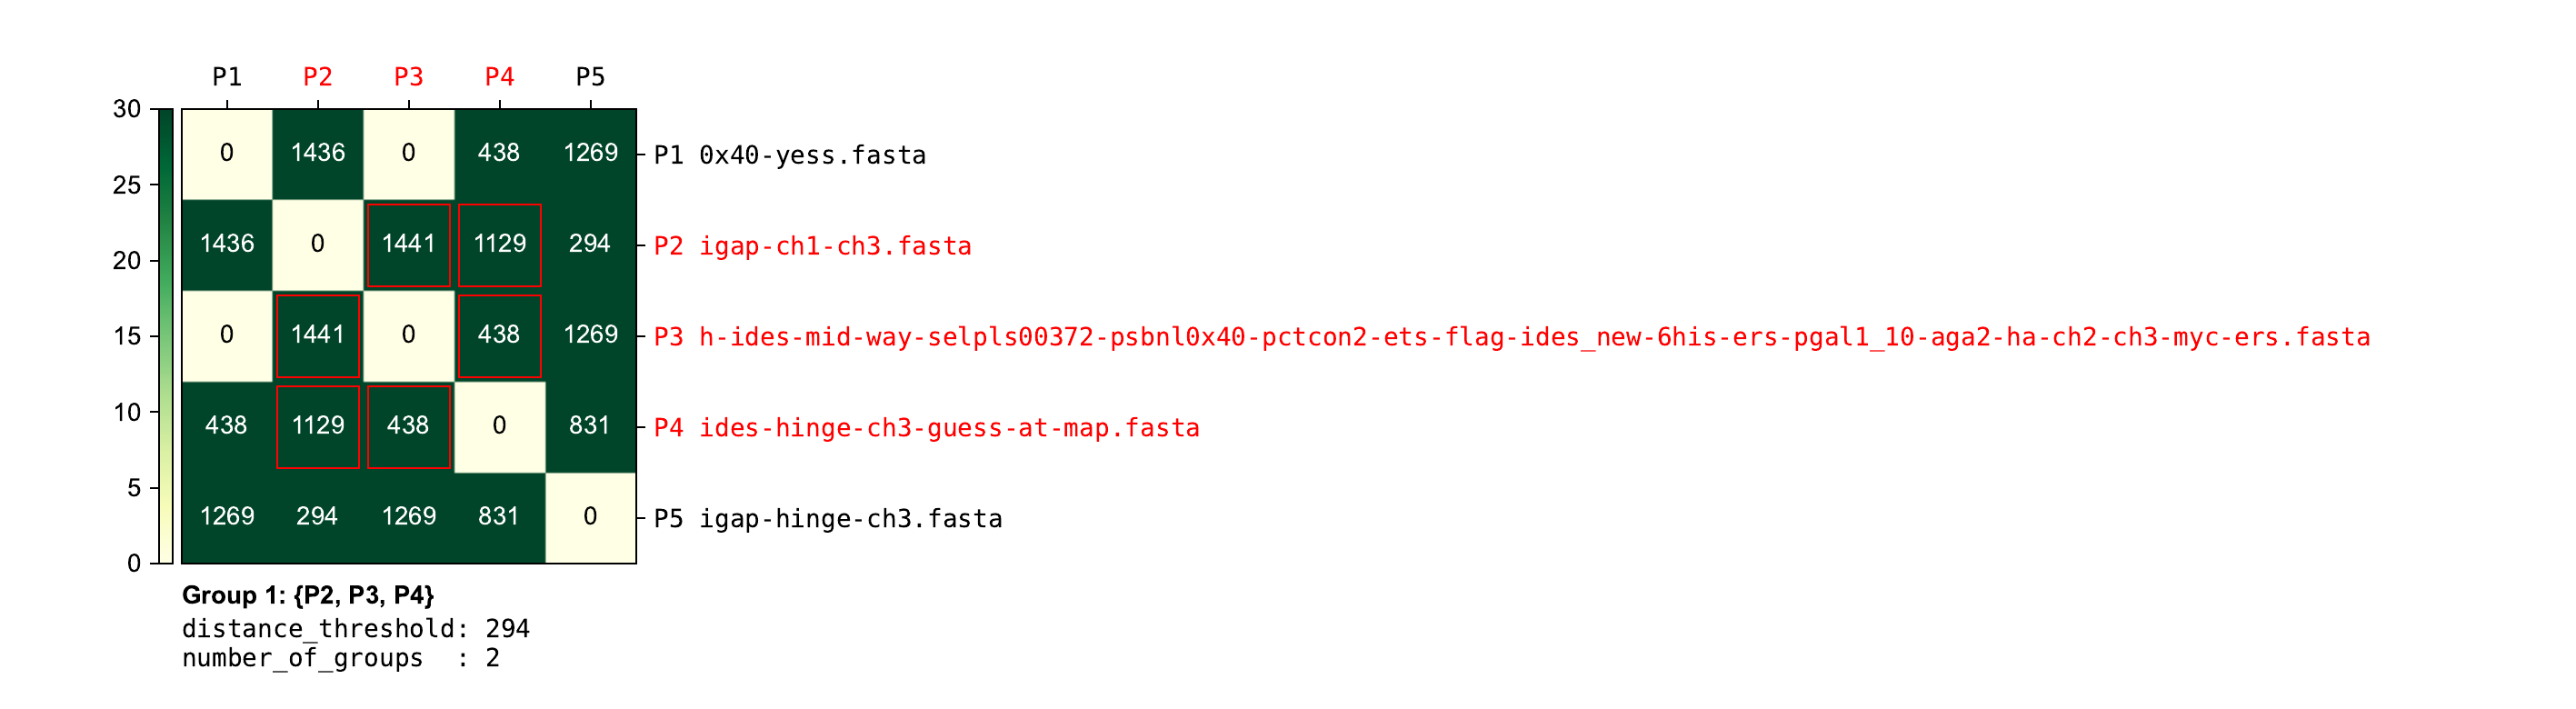

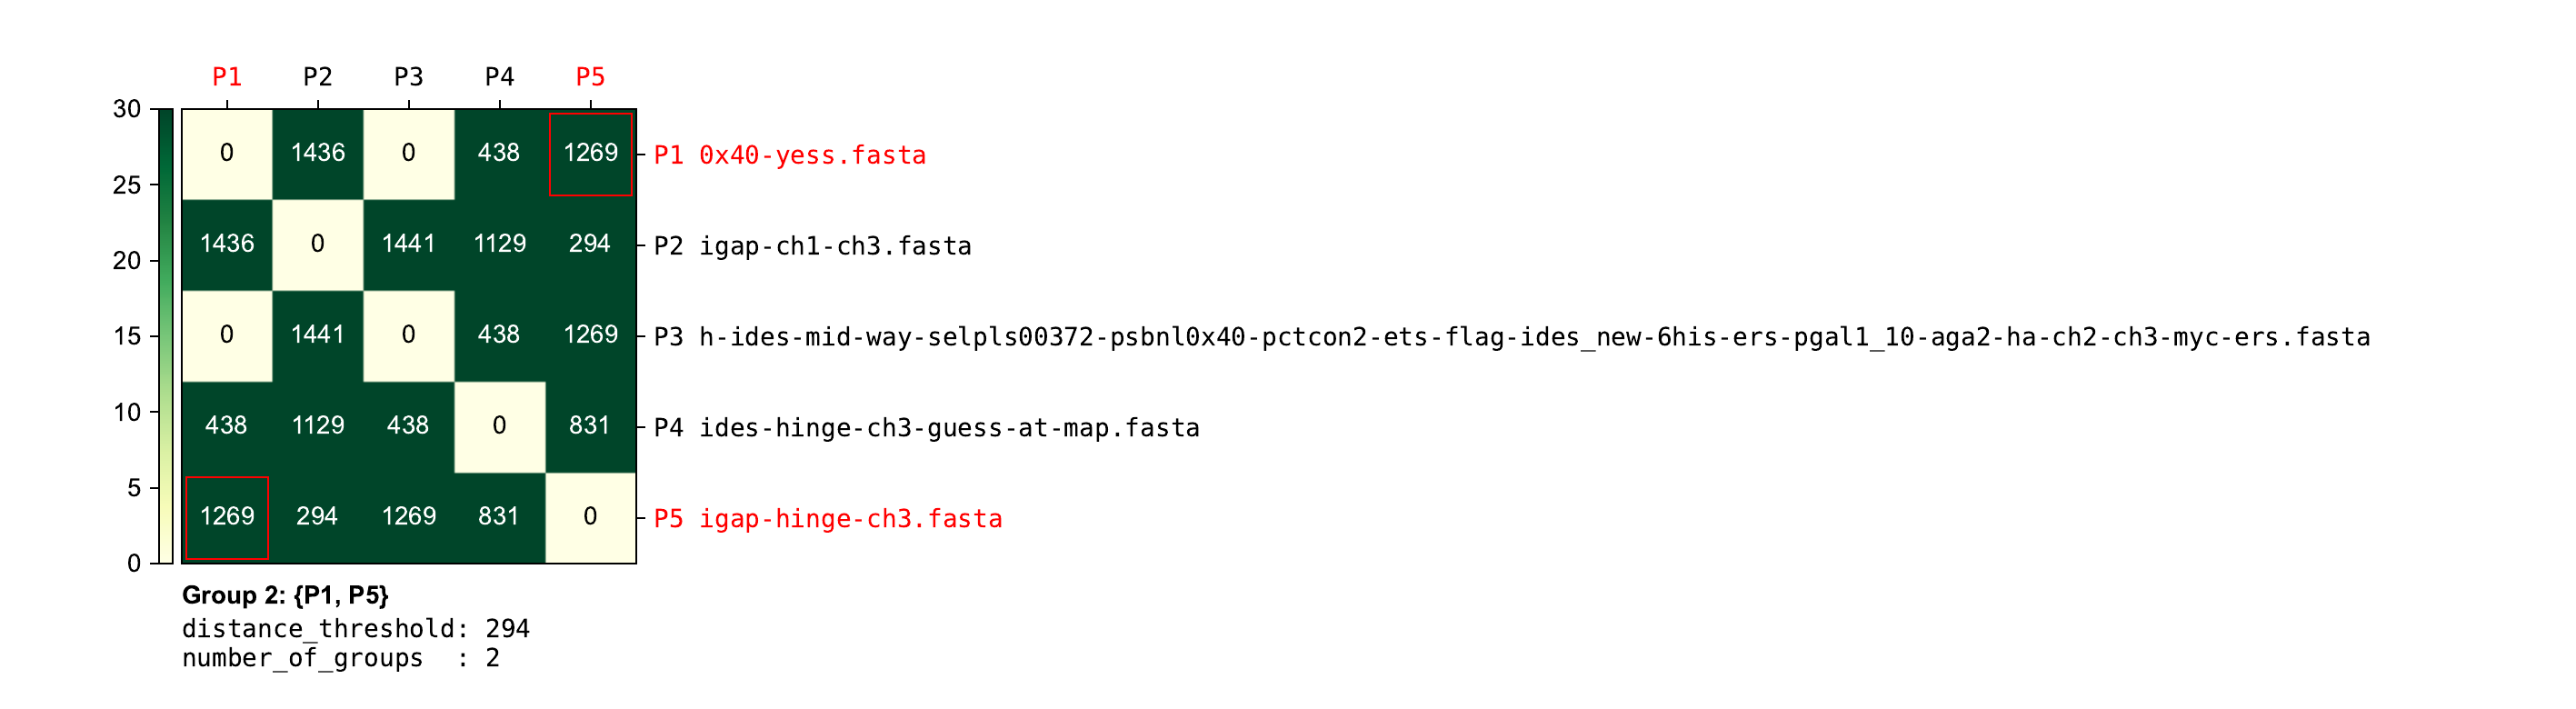

In [1]:
# install dependencies
print("installing dependencies...")
import sys, os
# save_stdout =  sys.stdout
# sys.stdout = open(os.devnull, 'w')

!pip install savemoney==0.3.7
!wget -nc https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/font/Arial.ttf
!wget -nc https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/font/Arial\ Bold.ttf
!pip install pdf2image
!apt-get install poppler-utils

# sys.stdout.close()
# sys.stdout = save_stdout
print("installation: DONE")

#@markdown <a name="Step1no1"></a>
#@markdown ## Step 1-1. Upload plasmid maps
#@markdown Click on the folder icon at left and then upload plasmid maps, i.e., expected plasmid sequences, to the `sample_data` directory.
#@markdown Currently either `*.fasta`, `*.fa` or `*.dna` files are supported.
#@markdown <br>
#@markdown Select the topology of DNA below (circular or linear for whole-plasmid or amplicon sequencing, respectively).
topology_of_dna = 'circular' #@param ["circular", "linear"]
if topology_of_dna == "circular":
    topology_of_dna = 0
elif topology_of_dna == "linear":
    topology_of_dna = 1
else:
    raise Exception(f"unknown topology_of_dna: {topology_of_dna}")
#@markdown <br>

#@markdown ## Step 1-2. Advanced settings

gap_open_penalty = 3   #param {type:"integer"}
gap_extend_penalty = 1 #param {type:"integer"}
match_score = 1        #param {type:"integer"}
mismatch_score = -2    #param {type:"integer"}
number_of_groups = 1   #@param {type:"number"}
distance_threshold = 8 #@param {type:"number"}
n_cpu = os.cpu_count()

#@markdown <ul><details><summary>Description (<code>number_of_groups</code>)</summary>
#@markdown Plasmids are grouped according to the <code>number_of_groups</code> specified.
#@markdown However, if this cannot be achieved with the given <code>distance_threshold</code> (see description below), the number of groups will be automatically increased.
#@markdown To achieve the desired <code>number_of_groups</code>, decrease the <code>distance_threshold</code>.
#@markdown </details></ul>
#@markdown <ul><details><summary>Description (<code>distance_threshold</code>)</summary>
#@markdown The <code>distance_threshold</code> (previously known as <code>threshold_pre</code>) value determines the minimum number of bases that two plasmids must differ by to be mixed together in the same sample.
#@markdown The default value of 6 is appropriate for general use but it can be
#@markdown <ul>
#@markdown <li>increased (quality-oriented decision) or</li>
#@markdown <li>decreased to as low as 2 (cost-oriented decision).</li>
#@markdown </ul>
#@markdown See <a href="https://doi.org/10.7554/eLife.88794.1">our publication</a> for more details.
#@markdown </details></ul><br>

#@markdown ## Step 1-3. Click this cell and hit `Runtime` -> `Run the focused cell`
#@markdown <ul><details><summary>Tips</summary>
#@markdown If you want to perform the pre-survey again with different settings but with the same plasmid set,
#@markdown moving the <code>recommended_grouping.txt</code> output file to the <code>sample_data</code> directory will reduce the calculation time.
#@markdown </details></ul><br>

#@markdown ## Step 1-4. View pre-survey results
#@markdown The results are displayed below, and can also be downloaded as a `recommended_grouping.zip` file from the `sample_data` directory.
#@markdown See <a href="#InterpretationOfResults">Interpretation of results</a> for details.

# params
param_dict = {i:globals()[i] for i in (
    'gap_open_penalty',
    'gap_extend_penalty',
    'match_score',
    'mismatch_score',
    'number_of_groups',
    'distance_threshold',
    'topology_of_dna',
    'n_cpu',
)}

# prepare
import savemoney
import matplotlib.font_manager as fm
font_path = '/content/Arial.ttf'
font_path_bold = '/content/Arial Bold.ttf'
fm.fontManager.addfont(font_path)
fm.fontManager.addfont(font_path_bold)

# execute
save_dir = savemoney.pre_survey('/content/sample_data/', '/content/sample_data/', **param_dict)

# display
from pdf2image import convert_from_path
from IPython.display import display, Image
images = convert_from_path((save_dir / savemoney.pre_survey_core.RecommendedGrouping.file_name).with_suffix(".pdf"))
for image in images:
    display(image)

# compress as zip
import os
from pathlib import Path
import zipfile
zip_path = save_dir.with_suffix(".zip")
os.chdir(save_dir)
with zipfile.ZipFile(zip_path.as_posix(), 'w') as f:
    f.write(Path(savemoney.pre_survey_core.RecommendedGrouping.file_name))
    f.write(Path(savemoney.pre_survey_core.RecommendedGrouping.file_name).with_suffix(".pdf"))
os.chdir("/content")


<a name="Step2"></a>
# Step 2. Submit samples
Mix plasmids according to the <a href="#Step1">**Step 1. Pre-survey**</a> results and submit sample(s) for nanopore sequencing.
<ul>
<details><summary>Verify plasmids</summary><hr>
   It is strongly recommended that you verify that your plasmids are built correctly by using a diagnostic restriction digestion or another method with an equivalent degree of confidence. SAVEMONEY cannot detect sequences that differ significantly from the uploaded plasmid maps.
   <hr></details>

<details><summary>Prepare samples</summary><hr>
   Mix together plasmids according to the grouping of the pre-survey step. It is important to use the same amount of each plasmid in the mixture. For example, the Plasmidsaurus standard service currently requires samples of 10 µL at 30 ng/µL (i.e., 300 ng of total plasmid). Therefore, if the pre-survey instructs you to mix three plasmids in a single sample, provide 100 ng of each plasmid in 10 µL total of water.
   <hr></details>

<details><summary>Submit samples</summary><hr>
Submit samples for sequencing to a third-party whole-plasmid sequencing service and obtain raw <code>*.fastq</code> files. Note that the consensus sequence provided by the commercial service is not likely to make any sense because you have provided them with a mixture of different plasmids.
<hr></details>
</ul>

<a name="Step3"></a>
# Step 3. Post-analysis

This step must be performed independently for each experimental sample mixture. Follow <a href="#Step3no1">**Step 3-1** and **Step 3-2**</a> below to execute the post-analysis. All processes are executed automatically.

After the completion of all processes, a `fastq_file_name.zip` file will appear in the `sample_data` directory. Right-click on the zip file to download it to your local storage. The zip file will also be automatically uploaded to your Google Drive, unless you uncheck `save_to_goole_drive` option at <a href="#Step3no4">**Step 3-4**</a> before execution.

In [ ]:
#@markdown <a name="Step3no1"></a>
#@markdown ## Step 3-1. Upload files
#@markdown The following two types of files must be uploaded to the `sample_data` directory, which is accessed by clicking on the file folder icon at left:
#@markdown - the plasmid map for each plasmid within the sample mixture (`*.fasta`, `*.fa`, or `*.dna`)
#@markdown - the raw nanopore sequencing results (`*.fastq`)

#@markdown If your results are split into multiple `*.fastq` files, just upload all of them;
#@markdown SAVEMONEY will merge those files and execute the analysis.
#@markdown <br>
#@markdown Select the topology of DNA below (circular or linear for whole-plasmid or amplicon sequencing, respectively).
topology_of_dna = 'circular' #@param ["circular", "linear"]
if topology_of_dna == "circular":
    topology_of_dna = 0
elif topology_of_dna == "linear":
    topology_of_dna = 1
else:
    raise Exception(f"unknown topology_of_dna: {topology_of_dna}")
#@markdown <br>

#@markdown ## Step 3-2. Click this cell and hit `Runtime` -> `Run cell and below`

#@markdown <font color='red'>**All processes below are executed automatically.**</font>

#@markdown Post-analysis is a multi-step process, and the cell that is currently running will be indicated by a circle with a stop sign next to it.
#@markdown There are some user-modifiable variables. If you would like to change them, please refer to the instructions for each cell.

In [ ]:
from pathlib import Path
pwd = Path('/content/sample_data/')
uploaded_fastq_files = [path for path in pwd.glob("*.fastq")]
uploaded_refseq_files = [path for path in pwd.glob("*.*") if path.suffix in (".dna", ".fa", ".fasta")]

if not len(uploaded_fastq_files) > 0:
    raise Exception("Please upload fastq files under the 'sample_data' directory!")
if not len(uploaded_refseq_files) > 0:
    raise Exception("Please upload reference files under the 'sample_data' directory!")

#@markdown ## Step 3-3. Select files
#@markdown <ul><details><summary>Tips</summary>
#@markdown If you do not want to use all files you uploaded, you can select which files to use at this step.
#@markdown Click this cell and hit <code>Runtime</code> -> <code>Run the focused cell</code>, then checkboxes will appear.
#@markdown Select files you want to include, and execute the following steps by clicking next cell <a href="#Step3no4"><b>Step 3-4. Execute alignment</b></a> and hitting <code>Runtime</code> -> <code>Run cell and below</code>.
#@markdown </details></ul>

from IPython.display import display
from ipywidgets import Checkbox, VBox, Layout, interactive_output, Label
# widgets
child_widget_list = [Label("# fastq files")]
arg_dict = {}
for uploaded_fastq in uploaded_fastq_files:
    ckbx = Checkbox(value=True, description=uploaded_fastq.name, indent=False, layout=Layout(width='80%'))
    child_widget_list.append(ckbx)
    arg_dict[uploaded_fastq.name] = ckbx
child_widget_list.extend([Label(" "), Label("# dna files")])
for uploaded_refseq in uploaded_refseq_files:
    ckbx = Checkbox(value=True, description=uploaded_refseq.name, indent=False, layout=Layout(width='80%'))
    child_widget_list.append(ckbx)
    arg_dict[uploaded_refseq.name] = ckbx
ui = VBox(children=child_widget_list)

# observation function
def select_data(**kwargs):
    N_fastq = sum([1 for k, ckbx in kwargs.items() if (ckbx & k.endswith(".fastq"))])
    N_refseq = sum([1 for k, ckbx in kwargs.items() if ckbx & (not k.endswith(".fastq"))])
    if (N_fastq > 0) & (N_refseq > 0):
        print(f"\n{N_fastq} fastq files selected\n{N_refseq} reference sequence files selected")
    else:
        error_text = ""
        if N_fastq == 0:
            error_text += f"\nPlease select at least 1 fastq file!"
        if N_refseq == 0:
            error_text += f"\nPlease select at least 1 reference sequence file!"
        print(error_text)

# display
out = interactive_output(select_data, arg_dict)
display(ui, out)

In [ ]:
#@markdown <a name="Step3no4"></a>
#@markdown ## Step 3-4. Execute alignment
save_to_google_drive = True #@param {type:"boolean"}
if save_to_google_drive:
    from pydrive.drive import GoogleDrive
    from pydrive.auth import GoogleAuth
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    print("You are logged into Google Drive and are good to go!")

# params
import os
gap_open_penalty = 3   #param {type:"integer"}
gap_extend_penalty = 1 #param {type:"integer"}
match_score = 1        #param {type:"integer"}
mismatch_score = -2    #param {type:"integer"}
n_cpu = os.cpu_count()
param_dict = {i:globals()[i] for i in (
    'gap_open_penalty',
    'gap_extend_penalty',
    'match_score',
    'mismatch_score',
    'topology_of_dna',
    'n_cpu',
)}

print("installing dependencies...")
# import sys, os
# save_stdout =  sys.stdout
# sys.stdout = open(os.devnull, 'w')

!pip install savemoney==0.3.7
!wget -nc https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/font/Arial.ttf
!wget -nc https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/font/Arial\ Bold.ttf

# sys.stdout.close()
# sys.stdout = save_stdout
print("installation: DONE")

# get files selected above
fastq_paths = []
plasmid_map_paths = []
for child_widget in child_widget_list:
    if not isinstance(child_widget, Checkbox):
        continue
    if child_widget.value & child_widget.description.endswith(".fastq"):
        fastq_paths.append(pwd / child_widget.description)
    elif child_widget.value & (not child_widget.description.endswith(".fastq")):
        plasmid_map_paths.append(pwd / child_widget.description)

# prepare
import matplotlib.font_manager as fm
font_path = '/content/Arial.ttf'
font_path_bold = '/content/Arial Bold.ttf'
fm.fontManager.addfont(font_path)
fm.fontManager.addfont(font_path_bold)

# execute
from savemoney import post_analysis_core as pac
from savemoney.modules import my_classes as mc
from savemoney.post_analysis import default_post_analysis_param_dict
param_dict = {key: param_dict.get(key, val) for key, val in default_post_analysis_param_dict.items()}
mc.assert_param_dict(param_dict)
if len(plasmid_map_paths) == 0:
    raise Exception(f"Error: No plasmid map file was detected!")
if len(fastq_paths) == 0:
    raise Exception(f"Error: No fastq file was detected!")

# 1. Prepare objects
ref_seq_list = [mc.MyRefSeq(plasmid_map_path) for plasmid_map_path in plasmid_map_paths]
my_fastq = mc.MyFastQ.combine([mc.MyFastQ(fastq_path) for fastq_path in fastq_paths])
save_dir = mc.new_dir_path_wo_overlap(Path('/content/sample_data/') / my_fastq.combined_name_stem, spacing="_")
save_dir.mkdir()

# 2. Execute alignment: load if any previous score_matrix if possible
result_dict, ref_seq_list = pac.execute_alignment(ref_seq_list, my_fastq, param_dict, save_dir)


In [ ]:
#@markdown <a name="Step3no5"></a>
#@markdown ## Step 3-5. Set threshold for assignment

score_threshold = 0.5  #@param {type:"number"}
param_dict["score_threshold"] = score_threshold

#@markdown <ul>
#@markdown <details><summary>Description</summary>
#@markdown The <code>score_threshold</code> (previously konwn as <code>threshold_post</code>) is a user-defined value between (recommended range of 0.2–0.8) that represents a cutoff for short reads.
#@markdown The default value of 0.5 provides a balance between including a higher number of reads and reads of sufficient length/quality.
#@markdown For example, if the total number of reads is small but plasmids in the mixture were quite different from one another, the threshold can be lowered below 0.5 to increase the number of reads that are passed on to the next step of analysis.
#@markdown Conversely, if the total number of reads is large and the plasmids in the mixture are highly similar to one another, the quality of subsequent analysis can be improved by raising the threshold above 0.5.
#@markdown See also "Summary distribution" and "Summary scatter" section of <a href="#InterpretationOfResults">Interpretation of results (post-analysis)</a>.
#@markdown </details>
#@markdown <details><summary>Tips</summary>
#@markdown <ul><li>
#@markdown You can change the <code>score_threshold</code> value even after all processes are finished. Just change the value and press <code>Runtime</code> -> <code>Run cell and below</code> (i.e., run Step 3-5 and after).
#@markdown You do not have to execute the time-consuming <a href="#Step3no4"><b>Step 3-4. Execute alignment</b></a> again.
#@markdown </li><li>
#@markdown If you want to re-analyze the data after a while, i.e., after the GoogleColab session is over,
#@markdown upload the <code>*.intermediate_results.ir</code> file together with other files at <a href="#Step3no1"><b>Step 3-1. Upload files</b></a> and run <a href="#Step3no1"><b>Step 3-2. Click this cell...</b></a> and after.
#@markdown See also "Other files" section of <a href="#InterpretationOfResults">Interpretation of results (post-analysis)</a>.
#@markdown </li></ul>
#@markdown </details>
#@markdown </ul>

# prepare
if (save_dir / my_fastq.combined_name_stem).with_suffix(".summary_scores.csv").exists():
    original_save_dir = save_dir
    save_dir = mc.new_dir_path_wo_overlap(Path('/content/sample_data/') / my_fastq.combined_name_stem, spacing="_")
    save_dir.mkdir()
    for suffix in [".intermediate_results.ir"]:
        file_name = my_fastq.combined_name_stem + suffix
        original_file_path = original_save_dir / file_name
        if original_file_path.exists():
            import shutil
            shutil.copy(original_file_path, save_dir / file_name)

# 3. normalize alignment score and set threshold for assignment
query_assignment = pac.normalize_scores_and_apply_threshold(ref_seq_list, my_fastq, result_dict, param_dict)

pac.draw_and_save_query_assignment(query_assignment, save_dir, display_plot=False)

# display
from IPython.display import SVG, display
display(SVG(filename=Path(save_dir) / f"{my_fastq.combined_name_stem}.summary_distribution.svg"))
display(SVG(filename=Path(save_dir) / f"{my_fastq.combined_name_stem}.summary_scatter.svg"))


In [ ]:
#@markdown <a name="Step3no6"></a>
#@markdown ## Step 3-6. Calculate consensus

error_rate = 0.00001     #@param {type:"number"}
del_mut_rate = error_rate / 4     # e.g. "A -> T, C, G, del"
ins_rate   = 0.00001     #@param {type:"number"}
window   = 160          #@param {type:"number"}
param_dict["error_rate"] = error_rate
param_dict["del_mut_rate"] = del_mut_rate
param_dict["ins_rate"] = ins_rate
param_dict["window"] = window

#@markdown <ul>
#@markdown <details><summary>Description (<code>error_rate</code> and <code>ins_rate</code>)</summary>
#@markdown These variables represent the prior probability of errors that occur during the plasmid construction, such as PCR, ligation, and assembly.
#@markdown <ul><li>The <code>error_rate</code> represents the prior probability that a base is replaced by another base including deletion.
#@markdown For example, mutation or deletion from "A" to "T", "C", "G", or "–". These conversions are treated equaly, i.e., prior probability of conversion from "A" to "T" is a quarter of <code>error_rate</code>.
#@markdown </li>
#@markdown <li>The <code>ins_rate</code>represents the prior probability of insertion.
#@markdown For example, the conversion of sequence "AT" to "ANT", where "N" represents one of the "A", "T", "C", and "G.
#@markdown </li>
#@markdown </ul>
#@markdown Regardless of these prior probability values, the results without considering them are always generated, which is the equivalent of using <code>error_rate</code> and <code>ins_rate</code> values of 0.8 and 0.8, respectively.
#@markdown See also "Consensus FASTQ files" section in <a href="#InterpretationOfResultsPost">Interpretation of results (post-analysis)</a>.
#@markdown </details>
#@markdown <details><summary>Description (<code>window</code>)</summary>
#@markdown The value represents the maximum detectable length of repetitive sequences when wrong plasmid maps are provided. If you suspect that the region of 80 nt might be repeated adjascently two times, put the value of 160.
#@markdown If the value is too large, it will take a long time to execute the process.
#@markdown </details>
#@markdown </ul>

# prepare
if (save_dir / my_fastq.combined_name_stem).with_suffix(".log").exists():
    original_save_dir = save_dir
    save_dir = mc.new_dir_path_wo_overlap(Path('/content/sample_data/') / my_fastq.combined_name_stem, spacing="_")
    save_dir.mkdir()
    for suffix in [
        ".intermediate_results.ir",
        ".summary_distribution.svg",
        ".summary_rotated.svg",
        ".summary_scatter.svg",
        ".summary_scores.csv",
    ]:
        file_name = my_fastq.combined_name_stem + suffix
        original_file_path = original_save_dir / file_name
        if original_file_path.exists():
            import shutil
            shutil.copy(original_file_path, save_dir / file_name)

# 4. MSA/consensus
my_msa_list = pac.execute_msa(result_dict, query_assignment, param_dict)


In [ ]:
#@markdown <a name="Step3no7"></a>
#@markdown ## Step 3-7. Export results
#@markdown See <a href="#InterpretationOfResultsPost">Interpretation of results (post-analysis)</a> for the detailed description of result files.

# 5. EXPORT
pac.export_results(my_msa_list, save_dir)
pac.export_log(ref_seq_list, my_fastq, param_dict, query_assignment, save_dir)

# compress as zip
import os
from pathlib import Path
import zipfile
zip_path = save_dir.with_suffix(".zip")
os.chdir(save_dir)
with zipfile.ZipFile(zip_path.as_posix(), 'w') as f:
    f.write(Path(my_fastq.combined_name_stem).with_suffix(".intermediate_results.ir"))
    f.write(Path(my_fastq.combined_name_stem).with_suffix(".log"))
    f.write(Path(my_fastq.combined_name_stem).with_suffix(".summary_distribution.svg"))
    f.write(Path(my_fastq.combined_name_stem).with_suffix(".summary_rotated.svg"))
    f.write(Path(my_fastq.combined_name_stem).with_suffix(".summary_scatter.svg"))
    f.write(Path(my_fastq.combined_name_stem).with_suffix(".summary_scores.csv"))
    for ref_seq in ref_seq_list:
        f.write(Path(ref_seq.path.name).as_posix() + ".ca")
        f.write(Path(ref_seq.path.name).as_posix() + ".consensus_with_prior.fastq")
        f.write(Path(ref_seq.path.name).as_posix() + ".consensus_without_prior.fastq")
        f.write(Path(ref_seq.path.name).as_posix() + ".gif")
os.chdir("/content")

if save_to_google_drive == True and drive:
  uploaded = drive.CreateFile({'title': zip_path.name})
  uploaded.SetContentFile(zip_path)
  uploaded.Upload()
  print(f"Uploaded {zip_path} to Google Drive with ID {uploaded.get('id')}")

<a name="Step4"></a>
# Step 4. Visualization of results (optional)
Please refer to the following sections to see in which cases this cell must be executed.
- "Alignment consensus (<code>*.ca</code>) files" section in <a href="#InterpretationOfResultsPost">Interpretation of results (post-analysis)</a>
- <a href="#FAQnoFastqDoesNotMatch">Troubleshooting – The consensus sequences of the two FASTQ files do not match</a>

In [ ]:
#@markdown ## Step 4-1. Upload files
#@markdown Upload the `plasmid_name.ca` file you obtained after <a href="#Step3">**Step 3. Post-analysis**</a> in the `sample_data` directory.<br><br>

#@markdown ## Step 4-2. Set parameters

target_file_path = "plasmid_name.fasta.ca" #@param {type:"string"}
target_position = 1000  #@param {type:"number"}
display_range = 50      #@param {type:"number"}
offset = 0              #@param {type:"number"}

#@markdown <ul>
#@markdown <details><summary>Description</summary>
#@markdown Example of results executing this cell with the following parameters are displayed below:
#@markdown <ul>
#@markdown <li>target_position = 1120
#@markdown <li>display_range = 50
#@markdown <li>offset = 4
#@markdown </ul>
#@markdown <img src="https://raw.githubusercontent.com/MasaakiU/MultiplexNanopore/master/resources/figures/view_alignment_results.png"  height="autox" width="800p">
#@markdown </details>
#@markdown </ul>
#@markdown <br>

#@markdown ## Step 4-3. Select this cell and hit `Runtime` -> `Run cell and below`

from pathlib import Path
pwd = Path('/content/sample_data/')
file_path = pwd / target_file_path
if file_path.exists():
    !pip install savemoney==0.3.7
    from savemoney import show_consensus
    show_consensus(
        consensus_alignment_path=file_path,
        center = target_position,
        seq_range = display_range,
        offset = offset
    )
else:
    print(f"file does not exist:\n{file_path}")



<a name="QuickGuide"></a>
# Quick guide

The algorithm permits mixing of six (or potentially even more) plasmids for sequencing with Oxford Nanopore Technology (e.g., Plasmidsaurus services) and permits mixing of plasmids with as few as two base differences.

## Quick start (pre-survey)
1. Upload plasmid maps (`*.fasta`, `*.fa`, or `*.fastq` files)
2. Click the cell <a href="#Step1no1">**Step 1-1 ~ Step 1-4**</a> and hit `Runtime` -> `Run the focused cell`
3. Results are displayed below the cell <a href="#Step1no1">**Step 1-1 ~ Step 1-4.**</a>

## Quick start (post-analysis)
1. Upload plasmid maps (`*.fasta`, `*.fa`, or `*.fastq` files)
2. Upload raw sequencing results file(s) (`*.fastq` file)
3. Click the cell <a href="#Step3no1">**Step 3-1 ~ Step 3-2**</a> and hit `Runtime` -> `Run cell and below`
4. The `fastq_file_name.zip` file can be downloaded from your Google Drive or `sample_data` directory.

<a name="InterpretationOfResults"></a>
# Interpretation of results

## Interpretation of results (pre-survey)
Two files are generated in the `sample_data` directory.
<ul>
<details><summary>Heatmaps (<code>recommended_grouping.pdf</code>)</summary><hr>
A heatmap is generated for each recommended grouping of plasmids to be mixed together. Below is an example of a pre-survey of 14 different plasmids that were classified into two groups.
<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_recommended_group.png" width="800"/></p>
Plasmids were classified into two groups (Group 1: P5, P9, P6, P1, P7, P11, P13; Group 2: P12, P14, P3, P2, P4, P8, P10), indicating that they can be submitted to sequencing as two samples. The values written in each panel indicate the number of bases that differ between each plasmid pair. Some of these values are emphasized by the colored frames within each group.

The list of all plasmids in that group is shown. Underneath it is the values of parameters that are applied during the analysis. Note that these values do not necessarily match the values provided by the user. See
<a href="#Step1"><b>Step 1-2. Advanced settings</b></a> for details.

<hr></details>
<details><summary>Text file (<code>recommended_grouping.txt</code>)</summary><hr>
A text file containing information displayed in the heatmap is also provided. Below is an example of a part of the output text file that shows information equivalent to the above heatmaps.
<pre><code><font size="2">&#35; recommended_grouping_txt(str)
=== Group 1 ===
P5  plasmid_name_5.fa
P9  plasmid_name_9.fa
P6  plasmid_name_6.fa
P1  plasmid_name_1.fa
P7  plasmid_name_7.fa
P11 plasmid_name_11.fa
P13 plasmid_name_13.fa<br>
=== Group 2 ===
P12 plasmid_name_12.fa
P14 plasmid_name_14.fa
P3  plasmid_name_3.fa
P2  plasmid_name_2.fa
P4  plasmid_name_4.fa
P8  plasmid_name_8.fa
P10 plasmid_name_10.fa</code></pre><hr></details>
</ul>

<a name="InterpretationOfResultsPost"></a>
## Interpretation of results (post-analysis)

Several files are generated by the post-analysis. We recommend to always review "Summary GIF", "Consensus FASTQ", "Summary distribution", and "Summary scatter" files.

- Files generated for each plasmid

<ul>
<details><summary>Summary GIF file</summary><hr>
<code>plasmid_name.gif</code> file represents a summary overview of the results.
The horizontal and vertical axis indicates the position of bases in the original plasmid map and the composition of base calling types: matched, skipped, mismatched, determined to be deletions or insertions, or not_covered.
Example of what each type exactly means are shown below. <code>match</code>, <code>mismatch</code>, <code>deletion</code>, and <code>insertion</code> are determined according to the base calling of the read against the plasmid map at the focused position.
<code>skipped</code> is applied when there is insertion in other read(s) but not in the read in focus.
The term <code>not_covered</code> appears when a read is aligned against the plasmid map but does not cover the whole sequence.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/alignment_legend.png" width="1000"/></p>

Because SAVEMONEY is designed assuming that there are no significant differences between the plasmid maps and the actual samples, it is recommended to always check this summary GIF file to confirm that the sample meets that assumption.

Below is an example of a typical <code>*.gif</code> file. The preponderance of positions labeled as match or skipped indicates that the plasmid sequence is as expected. The results also indicate that one mutation was found by SAVEMONEY at position 1808, which is displayed with a thin vertical purple line. See <a href="#FAQnoGifFileLooksWeird">Troubleshooting — My GIF file looks weird</a> for more information.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_gif_1.png" width="1000"/></p>

<hr></details>

<details><summary>Consensus FASTQ files</summary><hr>
For each plasmid that is detected within the mixture, <a href="#Step3"><b>Step 3. Post-analysis</b></a> will provide two <code>*.fastq</code> files containing consensus sequences (i.e., the sequence of your plasmid) and consensus quality scores.

There are two <code>*.fastq</code> files because one of them, <code>plasmid_name.consensus_with_prior.fastq</code>, has used Bayesian analysis to include prior probability of error during plasmid construction, and the other, <code>plasmid_name.consensus_without_prior.fastq</code>, does not include such probabilities. See <a href="#Step3no6"><b>Step 3-6. Calculate consensus</b></a> and <a href="https://doi.org/10.1101/2023.04.12.536413">our publication</a> for more explanation.

In most instances, these files contain identical consensus sequences. A manual alignment of them can be performed in your DNA analysis software, e.g., SnapGene, ApE, etc. Below is an example of an alignment of two <code>*.fastq</code> files against the plasmid map using SnapGene. One mutation was detected in the vector backbone.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_alignment_match.png" width="800"/></p>

If there are no differences between these two <code>*.fastq</code> files, then they represents the sequence of your plasmids and you may stop here.
If there are differences at specific positions between these two <code>*.fastq</code> files, we recommend consulting <a href="#FAQnoFastqDoesNotMatch">Troubleshooting — The consensus sequences of the two fastq files do not match</a>, which will guide you to perform <a href="#Step4"><b>Step 4. Visualization of results</b></a>.

<hr></details>

<details><summary>Alignment consensus (<code>*.ca</code>) files</summary><hr>
An alignment consensus file (<code>plasmid_name.ca</code>) contains full alignments information for all reads corresponding to each plasmid. This file can be used to inspect the alignment of all reads to the corresponding plasmid map in <a href="#Step4"><b>Step 4. Visualization of results (optional)</b></a>. This process is roughly the nanopore sequencing equivalent to manually inspecting chromatograms at positions labeled “N” in Sanger sequencing. See <a href="#Step4"><b>Step 4. Visualization of results (optional)</b></a> for more details.
<hr></details>
</ul>

- Files generated for each sample
<ul>

<details><summary>Summary distribution (<code>*.summary_distribution.svg</code>)</summary><hr>
The summary distribution represents a general quality check of the results for each plasmid. Distribution of read lengths and quality scores are displayed in the stacked histogram. The number of rows corresponds to the number of plasmids in the sample, and for each row, the portion that the plasmid occupies in the histogram is shown in blue.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_summary_distribution.png" width="800"/></p>

<hr></details>

<details><summary>Summary scatter (<code>*.summary_scatter.svg</code>)</summary><hr>
The summary scatter shows normalized alignment scores for each read against each plasmid map in the sample.
In each panel, reads classified to the plasmid shown in the column are indicated with blue dots.

Two examples are provided: one with three plasmids that are very different, and one with three plasmids that are more similar. In the latter example, the dots appear closer to the line y=x.

The summary scatter can be used to evaluate the success of the classification step and if necessary, modify the `threshold_post` parameter. For example, if the total number of reads was small but each plasmid was sufficiently different (example 1), the threshold can be lowered to ~0.2–0.4 to increase the number of reads that are passed on to the next step of analysis. Conversely, if the total number of reads is large and the plasmids are highly similar to each other (example 2), the quality of the subsequent analysis can be improved by raising the threshold to ~0.6–0.8. See also <a href="#Step3no5"><b>Step 3-5. Set threshold for assignment</b></a>.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_summary_scatter.png" width="800"/></p>

<hr></details>

<details><summary>Summary scatter rotated (<code>*.summary_rotated.svg</code>)</summary><hr>
This file contains the same information as <code>*.summary_scatter.svg</code>, but the graph is rotated and expanded horizontally.
This transformed version of the summary scatter is particularly beneficial when plasmids that differ by only a few bases were mixed.

Example below displays plasmids that differ by only two bases. In the pre-transformation graph on theleft, it is difficult to distinguish if these plasmids were successfully separated or not, but it is clear in the post-transformation graph on the right.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_summary_scatter_rotated.png" width="800"/></p>

<hr></details>

<details><summary>Other files</summary><hr>
<ul>
<li><code>*.summary_scores.csv</code></li>
<dd>Summary score table of normalized alignment score of each read against each plasmid maps. Scores in this file are used to classify reads and to generate summary scatter. Note that alignment scores are not calculated for plasmid map-read pairs with very low similarity to improve processing speed.</dd>
<li><code>*.intermediate_results.ir</code></li>
<dd>This file can be used to restart the analysis skipping the time-consuming step of <a href="#Step3no4"><b>Step 3-4. Execute alignment</b></a>. Upload this file to the <code>sample_data directory</code> together with your plasmid map files and fastq file(s), and execute the analysis from <a href="#Step3no1"><b>Step 3-2. Click this cell and hit <code>Runtime</code> -> <code>Run cell and below</code></b></a>.</dd>
<li><code>*.log</code></li>
<dd>Record of settings that generated results.</dd>
</ul>
<hr></details>

</ul>

<a name="FAQ"></a>
# Troubleshooting

Please feel free to create issues at [GitHub issues](https://github.com/MasaakiU/MultiplexNanopore/issues) or contact us ([@MasaakiU5](https://twitter.com/MasaakiU5)) with any questions or feedback.

<a name="FAQnoGifFileLooksWeird"></a>
<h4><details><summary>My GIF file looks weird</summary><hr>

Please check which of the following examples best applies to you and follow the guide.

<b>Example 1. Typical result</b><br>
The results displayed in this GIF file are acceptable. In the example below, the results indicate one mutation was found by SAVEMONEY at position 1808, which is displayed with a thin vertical purple line. Please examine the two <code>*.fastq</code> files that were generated by SAVEMONEY, following the instructions in <a href="#InterpretationOfResultsPost">Interpretation of results (post-analysis)</a>.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_gif_1.png" width="1000"/></p>

<b>Example 2. Noisy background</b><br>
The results displayed in this GIF file are acceptable. In the example below, although regions of ~300–400 and ~1200–1300 show relatively high noise, this level of noise is not high enough to cause problems for the analysis. Please examine the two <code>*.fastq</code> files that were generated by SAVEMONEY, following the instructions in <a href="#InterpretationOfResultsPost">Interpretation of results (post-analysis)</a>.
<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_gif_2.png" width="1000"/></p>

<b>Example 3. Low number of reads</b><br>
If the number of reads is small, the GIF file gets even more noisy. Only nine reads were obtained for the example below. Even with such a small number of reads, SAVEMONEY returns a somewhat reliable consensus sequence. Please examine the two <code>*.fastq</code> files that were generated by SAVEMONEY, following the instructions in <a href="#InterpretationOfResultsPost">Interpretation of results (post-analysis)</a>. However, you might sometimes observe discrepancies of consensus sequences between them. In such cases, please follow the instructions in <a href="#FAQnoFastqDoesNotMatch">Troubleshooting — The consensus sequences of the two fastq files do not match</a>. Nanopore sequencing may need to be performed again in some cases.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_gif_3.png" width="1000"/></p>

<b>Example 4. Local sequence discrepancies between the plasmid map and the plasmid in the sample</b><br>
In the example below, a large insertion, indicated by thick green band, was detected in position ~7270. In such a case, SAVEMONEY may not be reporting the correct consensus sequence in the <code>\*.fastq</code> files for that area in rare occasions. It is recommended to check the raw data around this region according to <a href="#Step4"><b>Step 4 Visualization of results (optional)</b></a>, and then examine the two <code>*.fastq</code> files following the instructions in <a href="#InterpretationOfResultsPost">Interpretation of results (post-analysis)</a>.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_gif_4.png" width="1000"/></p>

<b>Example 5. No reads at all</b><br>
The results indicate that no reads were detected for the plasmid map. There are several possible causes. Check the following factors and perform nanopore sequencing again.
<ul>
<li>Did your plasmid show the correct band patterns during restriction digestion check?</li>
<li>Did you mix equal amounts of plasmids when you made the mixture of plasmids for sample submission?</li>
<li>Did the sequencing result in a sufficient number of reads (more than 30 reads per plasmid) for other plasmids in the same sample?</li>
<li>Do other plasmids in the sample differ in sequence by two or more bases from the undetected plasmid?</li>
<li>Is your plasmid map correct, including vector backbone? If you have mixed plasmids with similar sequences, and the vector backbone sequence differs between the map and the actual plasmid, reliable analysis may not be performed.</li>
</ul>
<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_gif_5.png" width="1000"/></p>

<hr></details>

<a name="FAQnoFastqDoesNotMatch"></a>
<h4><details><summary>The consensus sequences of the two FASTQ files do not match</summary><hr>

If there are differences at specific positions between the two <code>*.fastq</code> files, your data quality might not be good enough to generate reliable consensus sequences, most likely due to the low number of reads. Usually in this instance, <code>plasmid_name.consensus_with_prior.fastq</code> tells you that sequences are the same as the reference, and <code>plasmid_name.consensus_without_prior.fastq</code> tells you that there is a mutation.

<p align="center"><img src="https://github.com/MasaakiU/MultiplexNanopore/raw/master/resources/figures/example_alignment_mismatch.png" width="600"/></p>

In this case, it is not fully rigorous to claim the absolute correctness of either the “with prior” results indicating that there is an error or the “without prior” results indicating that there is no error. In other words, there is a good chance that the sequence of your plasmid is correct. Do not discard your plasmid!
We recommend taking the following steps to examine your plasmid sequence:
<ol>
<li>
Inspect the alignment of all reads corresponding to the position of this plasmid, following <a href="#Step4"><b>Step 4. Visualization of results (optional)</b></a>. This process is roughly the nanopore sequencing equivalent to manually inspecting chromatograms at positions labeled “N” in Sanger sequencing. To do so, you must first perform the alignment visualization below. </li><li>
If the number of reads is low (less than 30), this may be the reason for the inability to determine the consensus base calling.
If you cannot make a consensus base call with confidence even with the help of <a href="#Step4"><b>Step 4. Visualization of results (optional)</b></a>, we recommend double-checking your plasmid concentration and quality, preparing new samples, and performing new nanopore sequencing.
</li><li>
If the number of reads is high enough (more than 30) but you still see discrepancy, your plasmid may contain multiple sequences. We recommend purifying the plasmid again from a single colony and send repeating nanopore sequencing.
</li>
</ol>
<hr></details>

<a name="FAQnoErrorsAtHomopolymerAndMethylation"></a>
<h4><details><summary>Errors were found in a homopolymer region / methylation site</summary><hr>

According to <a href="https://www.plasmidsaurus.com/faq/">plasmidsaurus</a>, Oxford Nanopore Sequencing is vulnerable to homopolymer stretches and the Dam methylation site (GATC). That means there is a possibility that the sequence is correct if the above sequences exist around the error site. We expect future improvement in their sequencing chemistry will circumvent this issue.
<hr></details>

<a name="ReleaseNotes"></a>
# Release notes

<a name="ver0no3no4"></a>
<h4><details><summary>ver_0.3.7 (this version)</summary><hr>
<h3>Internal changes</h3>
<ul>
    <li>Resolved an issue that caused execution failures with numpy versions >=2.0.0
    <li>bug fixes in alignment
</ul>
<hr></details>

<a name="ver0no3no4"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.3.4.ipynb">ver_0.3.4</a></summary><hr>
<h3>Internal changes</h3>
<ul>
    <li>bug fixes in alignment
</ul>
<hr></details>

<a name="ver0no3no3"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.3.3.ipynb">ver_0.3.3</a></summary><hr>
<h3>Internal changes</h3>
<ul>
    <li>minor bug fixes in consensus calculation
    <li>minor bug fixes when drawing gif files
</ul>
<hr></details>

<a name="ver0no3no1"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.3.1.ipynb">ver_0.3.1</a></summary><hr>
<h3>New features</h3>
<ul>
    <li>faster processing by parallel computing
    <li>support for amplicon sequencing (select 'linear' in <a href="#Step1no1"><b>Step 1-1</b></a> and <a href="#Step3no1"><b>Step 3-1</b></a>)
    <li>support for degenerate base symbols (A, T, C, G, K, M, R, S, W, Y, B, V, D, H, N) in plasmid maps
</ul>
<h3>Internal changes</h3>
<ul>
    <li>bug fixes that q-scores were not included during the consensus calculation
    <li>minor bug fixes when showing consensus
    <li>removed unnecessary assertion
</ul>
<hr></details>

<a name="ver0no2no16"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.2.16.ipynb">ver_0.2.16</a></summary><hr>
<h3>Internal changes</h3>
<ul>
    <li>bug fixes for the alignment error when there is an insert at the end of the plasmid map
</ul>
<hr></details>

<a name="ver0no2no15"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.2.15.ipynb">ver_0.2.15</a></summary><hr>
<h3>Internal changes</h3>
<ul>
    <li>bug fixes for the alignment error against very short reads
</ul>
<hr></details>

<a name="ver0no2no14"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.2.14.ipynb">ver_0.2.14</a></summary><hr>
<h3>Internal changes</h3>
<ul>
    <li>bug fixes (<a href="https://github.com/MasaakiU/MultiplexNanopore/issues/3">issue #3</a>)
</ul>
<hr></details>

<a name="ver0no2no13"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.2.13.ipynb">ver_0.2.13</a></summary><hr>
<h3>New features</h3>
<ul>
    <li>Improvement in the alignment of reads with high error rate
    <li>Bug fixes in the alignment of the edges of query sequences
    <li>Bug fixes in show_consensus command run via command line
    <li>Minor updates in display style of alignment in Step 4
    <li>Minor updates in log file format
</ul>
<h3>Internal changes</h3>
<ul>
    <li>Updates in the msa parameter (1 > 5, -2 > -4, -3 > -8, -1 > -6 for <code>m</code>, <code>n</code>, <code>g</code>, <code>e</code>, respectively)
    <li>Major updates in msa.py for adding function to automatically select NanoporeStats_PDF_version from multiple PDF files
    <li>Added gen_stats.py to make NanoporeStats_PDF_version files
</ul>
<hr></details>

<a name="ver0no2no11"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.2.11.ipynb">ver_0.2.11</a></summary><hr>

<h3>New features</h3>
<ul>
    <li>Step 1. Pre-survey
        <ul>
            <li>Faster execution speed
            <li>Support for setting <code>number_of_groups</code>
            <li>Accepts a large number (~100) of plasmids
        </ul>
    <li>Step 3. Post-analysis
        <ul>
            <li>Faster execution speed
            <li>Improved estimation of the sequence when wrong plasmid maps are provided
            <li>Reduced size of exported files
        </ul>
    <li>Step 4. Visualization of results
        <ul>
            <li>Improved display style of alignment results
            <li>Accepts <code>offset</code> parameter when displaying alignment results
        </ul>
    </ul>
<h3>Internal changes</h3>
<ul>
    <li>The parameter <code>threshold_pre</code> was renamed to <code>distance_threshold</code>
    <li>The parameter <code>threshold_post</code> was renamed to <code>score_threshold</code>
    <li>Format of output files were changed
        <ul>
            <li><code>recommended_grouping.txt</code> (<- <code>recommended_groupings.txt</code>)
            <li><code>recommended_grouping.pdf</code> (<- <code>recommended_group_#.svg</code>)
            <li><code>fastq_file_name.log</code> (<- <code>log_with/without_prior.txt</code>)
            <li><code>fastq_file_name.csv</code> (<- <code>summary_scores.txt</code>)
            <li><code>fastq_file_name.summary_rotated.svg</code> (new)
            <li><code>fastq_file_name.intermediate_results.ir</code> (<- <code>fastq_file_name.intermediate_results.ir</code>)
            <li><code>plasmid_name.fa.ca</code> (<- <code>plasmid_name.alignment_with/without_prior.txt</code>)
        </ul>
    <li>All codes were replaced with <a href="https://pypi.org/project/savemoney/">PyPI</a>-based scripts
</ul>
<hr></details>

<a name="ver0no1no0"></a>
<h4><details><summary><a href="https://colab.research.google.com/github/MasaakiU/MultiplexNanopore/blob/master/colab/MultiplexNanopore_ver_0.1.0.ipynb">ver_0.1.0 (original)</a></summary><hr>

Basic piplein of SAVEMONEY was created.
<ul>
    <li>Step 1. Pre-survey
        <ul>
            <li>Step 1-1. Upload plasmid maps
            <li>Step 1-2. Advanced settings
            <li>Step 1-3. Click this cell and hit <code>Runtime</code> -> <code>Run the focused cell</code>
            <li>Step 1-4. View pre-survey results
        </ul>
    <li>Step 2. Submit samples
    <li>Step 3. Post-analysis
        <ul>
            <li>Step 3-1. Upload files
            <li>Step 3-2. Click this cell and hit <code>Runtime</code> -> <code>Run cell and below</code>
            <li>Step 3-3. Select files
            <li>Step 3-4. Execute alignment
            <li>Step 3-5. Set threshold for assignment
            <li>Step 3-6. Calculate consensus
            <li>Step 3-7. Export results
        </ul>
    <li>Step 4. Visualization of results (optional)
        <ul>
            <li>Step 4-1. Upload files
            <li>Step 4-2. Set parameters
            <li>Step 4-3. Select this cell and hit <code>Runtime</code> -> <code>Run cell and below</code>
        </ul>
</ul>
<hr></details>

